# Sleep  Quality Prediction Web Application - Regression Models 

This python code was used to do the following - 

- Preprocess the dataset

- Identification of the Significant Variables

- Exploratory Data Analysis (EDA)

- Model Training

- Hyperparameter Tuning

- Model Evaluation




****Explanation of the codes and results are discussed in details in the project report 2313071.pdf**

Student Name - Sachini Dilka Tennakoon

RGU ID - 2313071 

IIT ID - 20222482

**Import the necessary libraries**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import FunctionTransformer
import math
from scipy.stats import probplot
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statistics import mean
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import KBinsDiscretizer
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import pandas as pd
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [10]:
# read the dataset.csv data file
df_main = pd.read_csv('Dataset/survey_responses_cleaned_dataset.csv')
df = df_main.copy()

In [11]:
df.describe()

,"On average, how many hours per day do you spend using your phone/tablet?","On average, how many hours per day do you spend using your laptop/computer?",Step count,Sleep score,"How stimulating(engaging and interesting) do you find the content you consume before bedtime? (1 being not stimulating at all, 5 being highly stimulating)",How many hours of sleep do you typically get per night?
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,7.778523,6.617450,5666.671141,67.194631,2.208054,5.093960
std,4.069656,3.875769,2886.570319,12.978505,1.008579,0.849024
min,1.000000,1.000000,1.000000,49.000000,1.000000,4.000000
25%,4.000000,4.000000,3908.000000,55.000000,1.000000,4.000000
50%,8.000000,6.000000,5000.000000,61.000000,2.000000,5.000000
75%,11.000000,9.000000,8088.000000,79.000000,3.000000,6.000000
max,17.000000,17.000000,15000.000000,91.000000,5.000000,6.000000


In [12]:
df.head()

,"On average, how many hours per day do you spend using your phone/tablet?","On average, how many hours per day do you spend using your laptop/computer?",Screencontent,Step count,Sleep score,Please specify your gender,What is your age group?,What is your current occupation or student status? (Please select one option):,"Do you use electronic devices (phone, tablet, laptop, computer) within an hour before bedtime?","How stimulating(engaging and interesting) do you find the content you consume before bedtime? (1 being not stimulating at all, 5 being highly stimulating)",How many hours of sleep do you typically get per night?,How frequently do you experience difficulty falling asleep or staying asleep?
0,11.0,1,Relaxing / Medatitave Content,8734,73,Male,25-30 years,Student,Yes,3,6,Occasionally (1-2 times a week)
1,4.0,8,Educational Content,9923,88,Male,18-24 years,Working Student,Yes,3,6,Rarely or never
2,4.5,8,Educational Content,8120,71,Male,13-17 years,Student,Yes,3,6,Occasionally (1-2 times a week)
3,9.5,2,Educational Content,10616,84,Female,25-30 years,Working Student,Yes,4,6,Sometimes (3-4 times a week)
4,9.0,9,Social Media,4493,58,Female,25-30 years,Employed,Yes,3,6,Sometimes (3-4 times a week)


# Ordinary Least Squares(OLS) Regression Analysis

OLS was used for the identification of the significant variables in the prediction of the sleep quality score

In [13]:
df_copy = df.copy()

In [14]:
# Rename columns for easier access (optional)
df_copy.columns = ['Phone_Hours', 'Laptop_Hours', 'Screencontent', 'Step_Count', 'Sleep_Score', 'Gender',
              'Age_Group', 'Occupation', 'Use_Before_Bed', 'Stimulating_Content', 'Sleep_Hours', 'Sleep_Difficulty']

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Screencontent', 'Gender', 'Age_Group', 'Occupation', 'Use_Before_Bed', 'Sleep_Difficulty']

for col in categorical_columns:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    label_encoders[col] = le  # Store the label encoder for future use if needed

# Split data into features (X) and target variable (y)
X_ols = df_copy.drop('Sleep_Score', axis=1)  # Features
y_ols = df_copy['Sleep_Score']  # Target

# Add a constant term to the model (intercept)
X_ols = sm.add_constant(X_ols)

# Fit the OLS regression model
model_ols = sm.OLS(y_ols, X_ols).fit()

# Display the model summary which includes p-values
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:            Sleep_Score   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     19.22
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           9.29e-22
Time:                        12:03:15   Log-Likelihood:                -527.85
No. Observations:                 149   AIC:                             1078.
Df Residuals:                     138   BIC:                             1111.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 100.2081    

Overall Interpretation

1.**Significant Variables**:
Phone_Hours, Laptop_Hours, Screencontent, Step_Count

2.**Insignificant Variables**:
Gender, Age_Group, Occupation, Use_Before_Bed, Stimulating_Content, Sleep_Hours, Sleep_Difficulty
   

In [17]:
# Creating a column called Screentime to capture both screentime spent on phone/tablet and computer/laptop
df['Screentime'] = df['On average, how many hours per day do you spend using your phone/tablet?'] + df['On average, how many hours per day do you spend using your laptop/computer?']

Select only the significant variables for data analysis and eventually for model training

In [18]:
columns_to_select = ['Screentime', 'Screencontent','Step count', 'Sleep score']

# Selecting the important features
df = df[columns_to_select]

# Exploratory Data Analysis (EDA) 

**Describe the dataset**


In [28]:
df.describe()

,Screentime,Step count,Sleep score
count,145.000000,145.000000,145.000000
mean,14.462069,5996.606897,66.882759
std,3.074923,2634.152787,13.017351
min,2.000000,200.000000,49.000000
25%,12.000000,4062.000000,55.000000
50%,16.000000,5196.000000,60.000000
75%,17.000000,8121.000000,79.000000
max,19.000000,15000.000000,91.000000


The comparatively high mean of 14.46 hours for screen time indicates that many people use screens for a significant amount of the day. With a wide range of 200 to 15,000 steps, the step count demonstrates significant variation, suggesting that participants' levels of physical activity vary. The range (49 to 91) indicates diverse sleep quality, however the majority of scores are focused around 60–79 (as indicated by the 25% to 75% range). The average sleep score is 66.88.

**Display the data types of each variable**

In [29]:
print("Data Types:\n")
dtypes = df.dtypes
print(dtypes)


Data Types:

Screentime       float64
Screencontent     object
Step count         int64
Sleep score        int64
dtype: object


**Check for missing values**

In [30]:
# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Screentime     145 non-null    float64
 1   Screencontent  145 non-null    object 
 2   Step count     145 non-null    int64  
 3   Sleep score    145 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.7+ KB
None
Screentime       0
Screencontent    0
Step count       0
Sleep score      0
dtype: int64


There are no missing values therefore no action has to be taken to remove null values. 

**Identifying Quantitative and Qualitative Variables in the Dataset**

In [31]:
# Initialize empty lists to hold the data types of each variable
quantitative_vars = []
qualitative_vars = []
# Loop through the columns and identify data types of each variable
for col in dtypes.index:
  if dtypes[col] == 'object':
    qualitative_vars.append(col)
  else:
    quantitative_vars.append(col)
# Print the quantitative and qualitative variables

print(quantitative_vars)
print('\nQualitative variables:')
print(qualitative_vars)


['Screentime', 'Step count', 'Sleep score']

Qualitative variables:
['Screencontent']


In [32]:
# Loop through columns and show available values for categorical variables (Screencontent)
for col in df.columns:
  if df[col].dtype == 'object':
    print('\nAvailable Values for {}:'.format(col))
    print(df[col].unique())


Available Values for Screencontent:
['Relaxing / Meditative' 'Educational' 'Social Media' 'News' 'Other']


The above code facilitates data exploration by identifying variables that are qualitative and quantitative separately. Additionally, it displays the categories that are available for the qualitative variables, giving an understanding of the structure of the data. Here, the quantitative variables are Screentime, Step count, Sleep score. The qualitative variable is Screencontent.



**Encode values in 'Screencontent'**

Encoded the categorical variable ‘Screencontent’ using LabelEncoder and created a new column as Screen_content_code’. This step ensures compatibility with machine learning algorithms.



In [33]:
# Apply label encoding to the 'Screencontent' column. This converts categorical values in 'Screencontent' to numerical values
label_encoder = LabelEncoder()

df['Screen_content_code'] = label_encoder.fit_transform(df['Screencontent'])



# Create a mapping from original values to encoded values
mapping = dict(zip(df['Screencontent'], df['Screen_content_code']))

# Print the mapping
print("Original Value to Encoded Value Mapping:")
for original, encoded in mapping.items():
    print(f"{original}: {encoded}")



Original Value to Encoded Value Mapping:
Relaxing / Meditative: 3
Educational: 0
Social Media: 4
News: 1
Other: 2


In [34]:
df['Screen_content_code'].unique()

array([3, 0, 4, 1, 2])

**Data Visualization using Histograms**

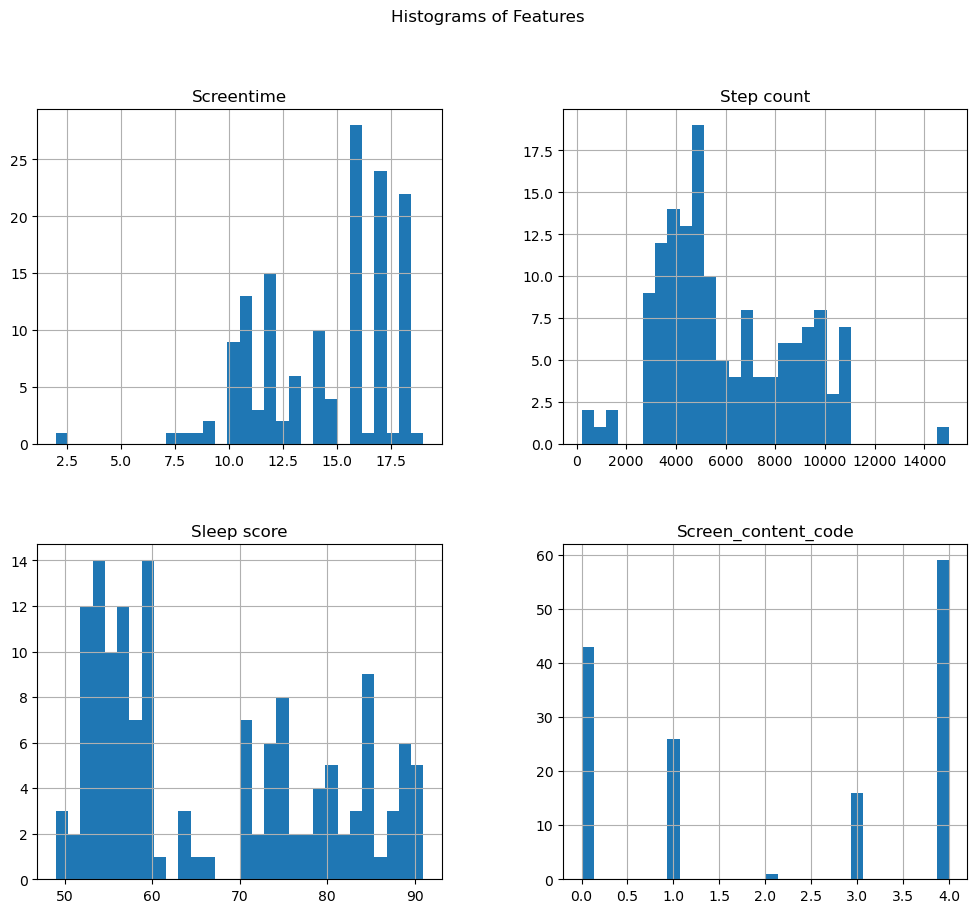

In [35]:
# Use visualizations to understand the relationships between variables.
# a. Histogram and Distribution Plots:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature
df.hist(bins=30, figsize=(12, 10))
plt.suptitle('Histograms of Features')
plt.show()



**Data Visualization using Distribution Plots**

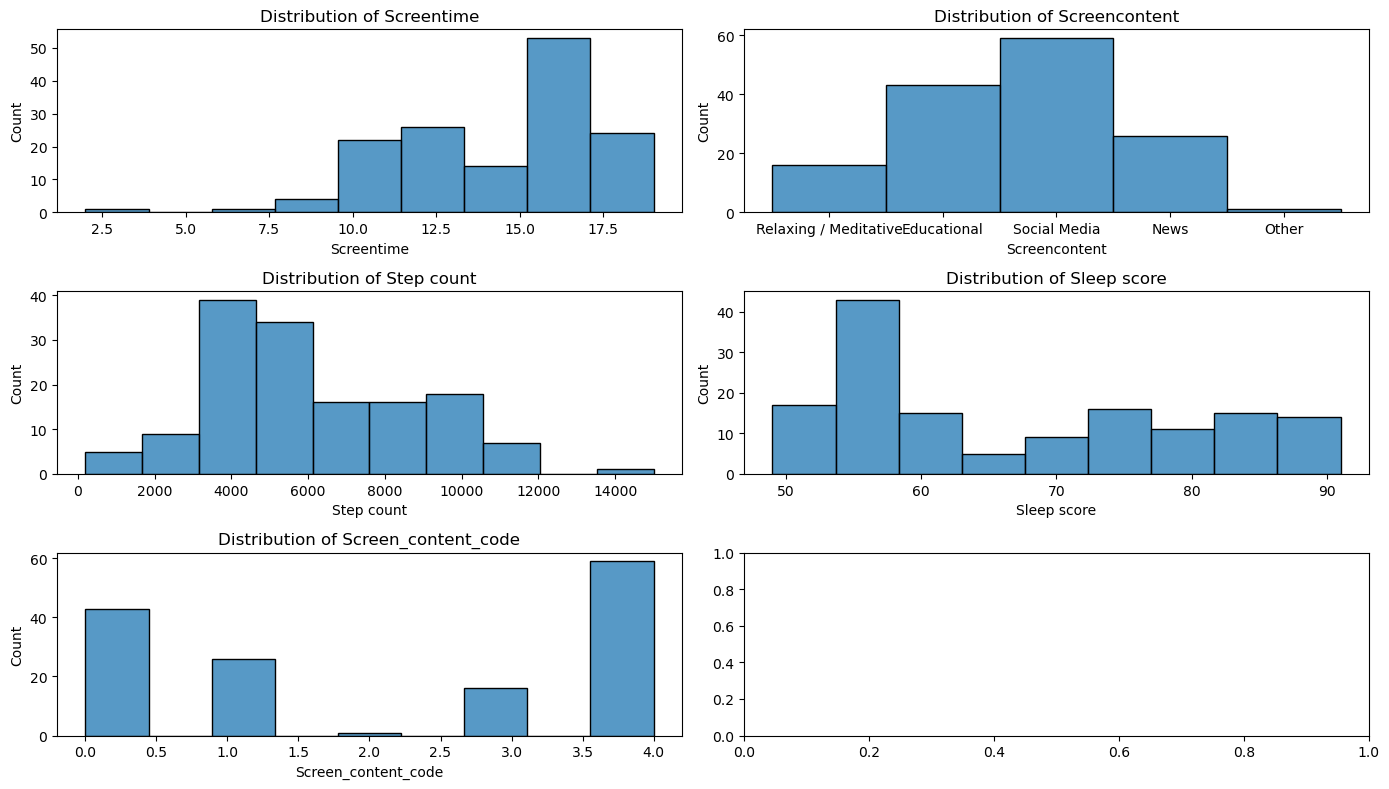

In [36]:
# Define the number of rows and columns for the grid of subplots
num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2  # Adjust the number of rows based on the number of columns

fig, axes = plt.subplots(num_rows, 2, figsize=(14, 8))  # 2 plots per row

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through columns and plot each one
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


The histograms and distribution plots help to visualize the distribution of key features in the dataset, which is critical in understanding their behavior before proceeding with the machine learning tasks.

The data distribution for the different variables is shown in the above figures. The most prevalent range in the sample is 15.0 to 17.5 hours, as indicated by the fact that the majority of screentime data points fall within this range.  The step count variable shows a noticeable peak between 4,000 and 6,000 steps, which is likely the average number of steps most participants take each day. In a similar vein, the sleep score distribution indicates that the 50–60 range is the most prevalent sleep score group due to its high frequency. Furthermore, the most popular content to watch before bed is from social media.



**Identify Outliers**

In [37]:
# Calculate z-scores
z_scores = np.abs(stats.zscore(df[['Screentime', 'Screen_content_code', 'Step count', 'Sleep score']]))

# Define a threshold
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).all(axis=1)

# Add a column for outliers in the original dataframe
df['Outlier'] = outliers

# Display outliers
print(df[df['Outlier']])

Empty DataFrame
Columns: [Screentime, Screencontent, Step count, Sleep score, Screen_content_code, Outlier]
Index: []


By computing the z-scores for particular features, establishing a threshold to identify outliers, and then marking those outliers in the dataset, the code mentioned above can be used to discover outliers in a dataset. This dataset has no outliers

**Identify skewness of data**

In [38]:
# Calculate skewness for each feature
skewness = df[['Screentime', 'Screen_content_code', 'Step count', 'Sleep score']].apply(lambda x: skew(x.dropna()))
print("Skewness of each feature:")
print(skewness)


Skewness of each feature:
Screentime            -0.776618
Screen_content_code   -0.109465
Step count             0.502816
Sleep score            0.410937
dtype: float64


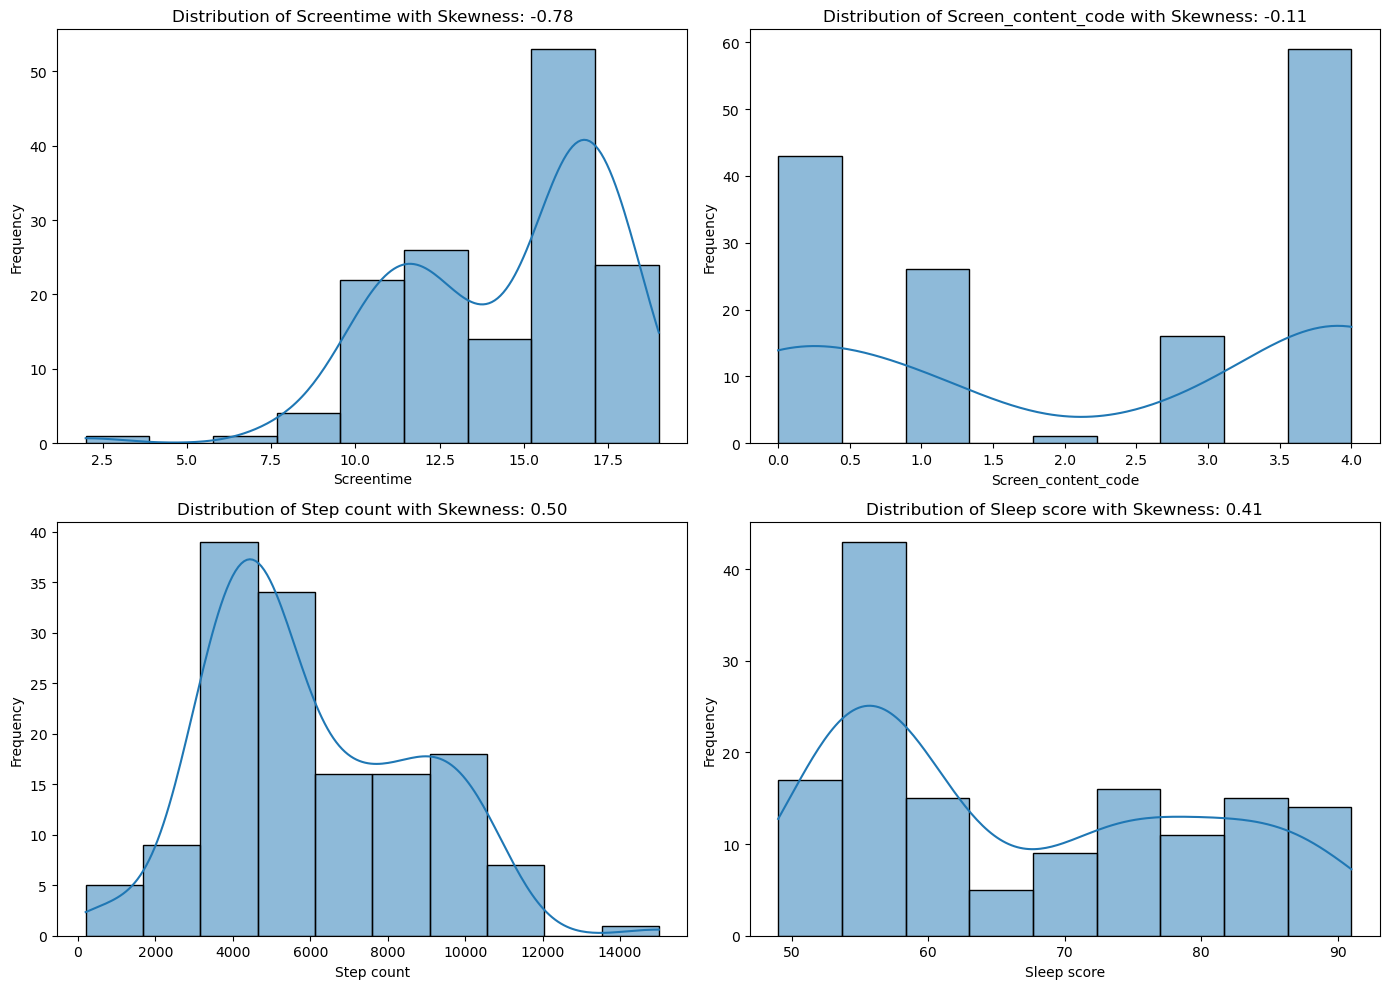

In [39]:
# List of columns to plot
columns = ['Screentime', 'Screen_content_code', 'Step count', 'Sleep score']

# Create a grid layout: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through the columns and plot each one
for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, ax=axes[i])  # Plot histogram with KDE
    axes[i].set_title(f'Distribution of {column} with Skewness: {skewness[column]:.2f}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


Interpretation of results:
Screentime: -0.776618 (Negative Skewness)
Interpretation: The data for screentime is left-skewed. This indicates that a small percentage of people use screens comparatively less frequently than the majority of people.

Screen_content_code: -0.109465 (Nearly Symmetrical)
Interpretation: The distribution of screen content categories is fairly symmetrical, as indicated by the screen content skewness being close to 0. The data is evenly distributed with respect to the frequency of various screen content types, and there are no notable outliers.

Step count: 0.502816 (Positive Skewness)
Interpretation: The step count data is right-skewed. This indicates that a small percentage of users have significantly higher step counts than the majority, who have lower step counts 

Sleep score: 0.410937 (Slight Positive Skewness)
Interpretation: The sleep score distribution is also right-skewed, but only slightly. This indicates that most users have moderate sleep scores, but a few have higher scores.


# Model Training

In [40]:
X = df.loc[:,['Screentime',
'Screen_content_code',
'Step count']]

In [41]:
X.head(5)

,Screentime,Screen_content_code,Step count
0,12.0,3,8734
1,12.0,0,9923
2,12.5,0,8120
3,11.5,0,10616
4,18.0,4,4493


In [42]:
y=df['Sleep score']

In [43]:
y.head(5)

0    73
1    88
2    71
3    84
4    58
Name: Sleep score, dtype: int64

**Splitting the data set into training and testing set**

The dataset was split to two datasets, 75% of data was used for training the models and the remaining 25% was used for testing the models.

In [44]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


Five regression models are implemented below in order to predict the sleep quality score among the youth:

1) Linear Regression Model
2) Random Forest Regression Model
3) Decision Tree Regression Model
4) KNN Regression Model
5) Support Vector Regression Model

**1) Linear Regression**

In [45]:
# fitting the general Linear Regression Model and evaluating the accuracy
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
regressor_prediction = linear_model.predict(X_test)
linear_R2 = r2_score(y_test, regressor_prediction)

In [46]:
# Calculate R2 squared
linear_R2 = r2_score(y_test, regressor_prediction)

# Calculate Mean Absolute Error (MAE)
linear_mae = mean_absolute_error(y_test, regressor_prediction)

# Calculate Mean Squared Error (MSE)
linear_mse = mean_squared_error(y_test, regressor_prediction)

# Calculate Root Mean Squared Error (RMSE)
linear_rmse = mean_squared_error(y_test, regressor_prediction, squared=False)

# Print all metrics
print("R2 Score:", linear_R2)
print("Mean Absolute Error (MAE):", linear_mae)
print("Mean Squared Error (MSE):", linear_mse)
print("Root Mean Squared Error (RMSE):", linear_rmse)


R2 Score: 0.527411498797497
Mean Absolute Error (MAE): 7.03929845992663
Mean Squared Error (MSE): 85.4232888053227
Root Mean Squared Error (RMSE): 9.24247200727829


**Standardize the features**

This code performs standardization on the features (X_train and X_test) using StandardScaler from the sklearn.preprocessing module. 

In [48]:
# standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Linear Regression Model - Improve Performance**
- Hyperparameter tuning using GridSearchCV

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# features have been standardized using StandardSCaler

# Define Ridge regression with cross-validation
ridge = Ridge()

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_ridge = ridge_grid.best_estimator_
regressor_prediction = best_ridge.predict(X_test_scaled)

# Evaluate the model
ridge_R2 = r2_score(y_test, regressor_prediction)
ridge_mae = mean_absolute_error(y_test, regressor_prediction)
ridge_mse = mean_squared_error(y_test, regressor_prediction)
ridge_rmse = mean_squared_error(y_test, regressor_prediction, squared=False)

# Print the tuned parameters and all metrics
print("Best Parameters for Ridge:", ridge_grid.best_params_)
print("R2 Score (Ridge):", ridge_R2)
print("Mean Absolute Error (MAE):", ridge_mae)
print("Mean Squared Error (MSE):", ridge_mse)
print("Root Mean Squared Error (RMSE):", ridge_rmse)

Best Parameters for Ridge: {'alpha': 10}
R2 Score : 0.7106960433152258
Mean Absolute Error (MAE): 5.033466509645698
Mean Squared Error (MSE): 41.86045205972137
Root Mean Squared Error (RMSE): 6.4699653831934345


**Actual vs Predicted Plot**

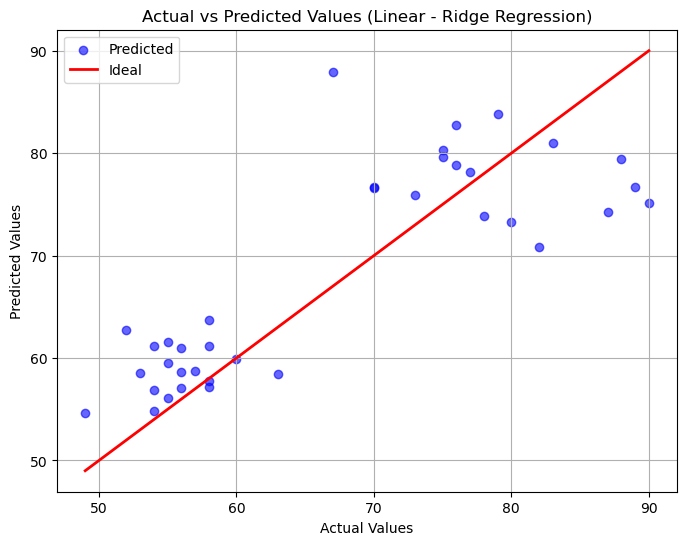

In [47]:
# Create the Actual vs Predicted plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, regressor_prediction, color='blue', label='Predicted', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear - Ridge Regression)')
plt.legend()
plt.grid(True)
plt.show()


**2) Random Forest Regression**

In [51]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
randomforest_prediction = random_model.predict(X_test)

In [53]:
# Calculate R2 squared
random_R2 = r2_score(y_test, randomforest_prediction)

# Calculate Mean Absolute Error (MAE)
random_mae = mean_absolute_error(y_test, randomforest_prediction)

# Calculate Mean Squared Error (MSE)
random_mse = mean_squared_error(y_test, randomforest_prediction)

# Calculate Root Mean Squared Error (RMSE)
random_rmse = mean_squared_error(y_test, randomforest_prediction, squared=False)

# Print all metrics
print("R2 Score:", random_R2)
print("Mean Absolute Error (MAE):", random_mae)
print("Mean Squared Error (MSE):", random_mse)
print("Root Mean Squared Error (RMSE):", random_rmse)


R2 Score: 0.669085083240843
Mean Absolute Error (MAE): 6.14138888888888
Mean Squared Error (MSE): 59.8149138888888
Root Mean Squared Error (RMSE): 7.73401020744664


**Random Forest Regression Model - Improve Performance** 

- Hyperparameter tuning using GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# features have been standardized using StandardSCaler
# Define the model
random_model_1 = RandomForestRegressor(random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=random_model_1, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_random_model = grid_search.best_estimator_

# Make predictions
randomforest_prediction_1 = best_random_model.predict(X_test_scaled)

# Evaluate the model
randomforest_R2 = r2_score(y_test, randomforest_prediction_1)
randomforest_MAE = mean_absolute_error(y_test, randomforest_prediction_1)
randomforest_MSE = mean_squared_error(y_test, randomforest_prediction_1)
randomforest_RMSE = mean_squared_error(y_test, randomforest_prediction_1, squared=False)

print(f"Random Forest R2 Score: {randomforest_R2}")
print(f"Random Forest Mean Absolute Error: {randomforest_MAE}")
print(f"Random Forest Mean Squared Error: {randomforest_MSE}")
print(f"Random Forest Root Mean Squared Error: {randomforest_RMSE}")



Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest R2 Score: 0.783504359324384
Random Forest Mean Absolute Error: 4.704254510515075
Random Forest Mean Squared Error: 31.325549403096804
Random Forest Root Mean Squared Error: 5.596923208611746


**Actual vs Predicted Plot**

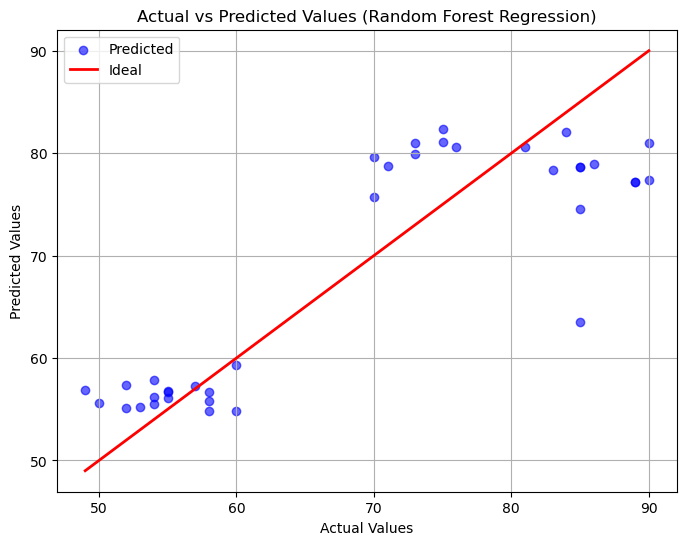

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create the Actual vs Predicted plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, randomforest_prediction_1, color='blue', label='Predicted', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest Regression)')
plt.legend()
plt.grid(True)
plt.show()


**3) Decision Tree Regression** 

In [58]:
from sklearn.tree import DecisionTreeRegressor
decision_model = DecisionTreeRegressor(max_depth=5)
decision_model.fit(X_train,y_train)
decision_prediction=decision_model.predict(X_test)

decision_R2 = r2_score(y_test, decision_prediction)

# Calculate Mean Absolute Error (MAE)
decision_mae = mean_absolute_error(y_test, decision_prediction)

# Calculate Mean Squared Error (MSE)
decision_mse = mean_squared_error(y_test, decision_prediction)

# Calculate Root Mean Squared Error (RMSE)
decision_rmse = mean_squared_error(y_test, decision_prediction, squared=False)

# Print all metrics
print("R2 Score:", decision_R2)
print("Mean Absolute Error (MAE):", decision_mae)
print("Mean Squared Error (MSE):", decision_mse)
print("Root Mean Squared Error (RMSE):", decision_rmse)

R2 Score: 0.565188409779732
Mean Absolute Error (MAE): 6.57881944444444
Mean Squared Error (MSE): 78.5948789544753
Root Mean Squared Error (RMSE): 8.86537528559707


**Decision Tree Regression Model - Improve Performance**

- Hyperparameter tuning using GridSearchCV

In [60]:
# features have been standardized using StandardSCaler

# Define the model
decision_model_1 = DecisionTreeRegressor(random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=decision_model_1, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_decision_model = grid_search.best_estimator_

# Make predictions
decision_prediction_1 = best_decision_model.predict(X_test_scaled)

# Evaluate the model
decision_R2_1 = r2_score(y_test, decision_prediction_1)
decision_MAE_1 = mean_absolute_error(y_test, decision_prediction_1)
decision_MSE_1 = mean_squared_error(y_test, decision_prediction_1)
decision_RMSE_1 = mean_squared_error(y_test, decision_prediction_1,squared=False)

print(f"Decision Tree R2 Score: {decision_R2_1}")
print(f"Decision Tree Mean Absolute Error: {decision_MAE_1}")
print(f"Decision Tree Mean Squared Error: {decision_MSE_1}")
print(f"Decision Tree Root Mean Squared Error: {decision_RMSE_1}")


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree R2 Score: 0.7036557180958591
Decision Tree Mean Absolute Error: 5.261111111111111
Decision Tree Mean Squared Error: 42.87914257369615
Decision Tree Root Mean Squared Error: 6.548216747611226


**Actual vs Predicted Plot**

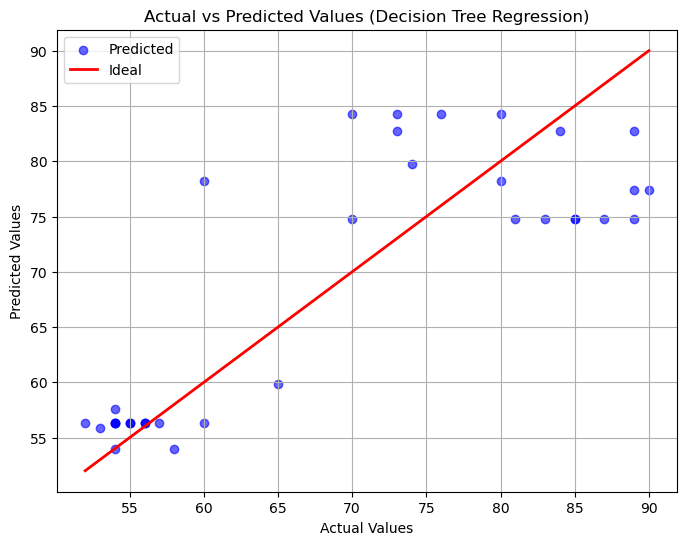

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Create the Actual vs Predicted plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, decision_prediction_1, color='blue', label='Predicted', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Decision Tree Regression)')
plt.legend()
plt.grid(True)
plt.show()


**4) KNN Regression**

In [81]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=8)
knn_model.fit(X_train,y_train)
knn_prediction=knn_model.predict(X_test)
knn_R2 = r2_score(y_test, knn_prediction)

# Calculate Mean Absolute Error (MAE)
knn_mae = mean_absolute_error(y_test,knn_prediction)

# Calculate Mean Squared Error (MSE)
knn_mse = mean_squared_error(y_test, knn_prediction)

# Calculate Root Mean Squared Error (RMSE)
knn_rmse = mean_squared_error(y_test, knn_prediction, squared=False)

# Print all metrics
print("R2 Score:", knn_R2)
print("Mean Absolute Error (MAE):", knn_mae)
print("Mean Squared Error (MSE):", knn_mse)
print("Root Mean Squared Error (RMSE):", knn_rmse)

print("R2 Score: 0.582451219317097")
print("Mean Absolute Error (MAE): 7.388888888888")
print("Mean Squared Error (MSE): 121.444444444444")
print("Root Mean Squared Error (RMSE): 11.020183503211")


R2 Score: 0.582451219317097
Mean Absolute Error (MAE): 7.388888888888
Mean Squared Error (MSE): 121.444444444444
Root Mean Squared Error (RMSE): 11.020183503211


**KNN Regression Model - Improve Performance**

- Hyperparameter tuning using GridSearchCV

In [82]:
# features have been standardized using StandardSCaler

# Define the KNN Regressor model
knn_model_1 = KNeighborsRegressor()

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=knn_model_1, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_knn_model = grid_search.best_estimator_

# Make predictions
knn_prediction_1 = best_knn_model.predict(X_test_scaled)

# Evaluate the model
knn_R2_1 = r2_score(y_test, knn_prediction_1)
knn_MAE_1 = mean_absolute_error(y_test, knn_prediction_1)
knn_MSE_1 = mean_squared_error(y_test, knn_prediction_1)
knn_RMSE_1 = mean_squared_error(y_test, knn_prediction_1,squared=False)

print(f"KNN R2 Score: {knn_R2_1}")
print(f"KNN Mean Absolute Error: {knn_MAE_1}")
print(f"KNN Mean Squared Error: {knn_MSE_1}")
print(f"KNN Root Mean Squared Error: {knn_RMSE_1}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'})
KNN R2 Score: 0.8133910539626867
KNN Mean Absolute Error: 4.357142857142857
KNN Mean Squared Error:  27.001133786848072
KNN Root Mean Squared Error: 5.196261520251658


**Actual vs Predicted Plot**

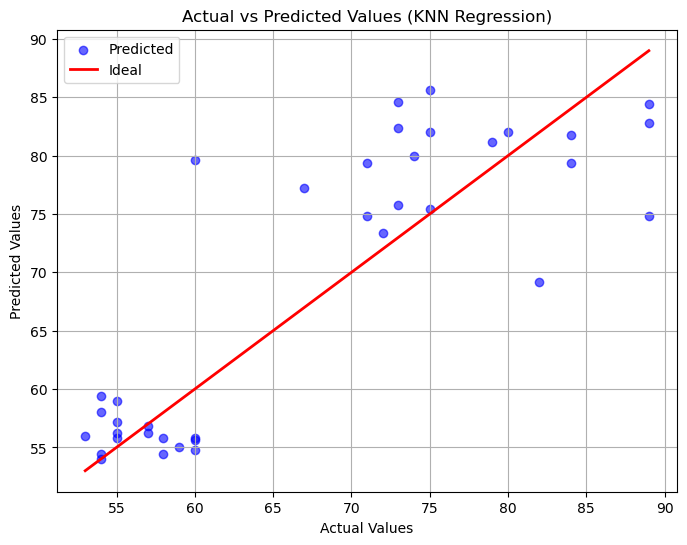

In [150]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create the Actual vs Predicted plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, knn_prediction_1, color='blue', label='Predicted', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (KNN Regression)')
plt.legend()
plt.grid(True)
plt.show()


**5) Support Vector Regression**

In [69]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train,y_train)
svm_predict = svm_regressor.predict(X_test)

svm_R2 = r2_score(y_test, svm_predict)

# Calculate Mean Absolute Error (MAE)
svm_mae = mean_absolute_error(y_test, svm_predict)

# Calculate Mean Squared Error (MSE)
svm_mse = mean_squared_error(y_test, svm_predict)

# Calculate Root Mean Squared Error (RMSE)
svm_rmse = mean_squared_error(y_test, svm_predict, squared=False)

# Print all metrics
print("R2 Score:", svm_R2)
print("Mean Absolute Error (MAE):", svm_mae)
print("Mean Squared Error (MSE):", svm_mse)
print("Root Mean Squared Error (RMSE):", svm_rmse)


R2 Score: 0.565250225109794
Mean Absolute Error (MAE): 8.23297745713719
Mean Squared Error (MSE): 120.843379768794
Root Mean Squared Error (RMSE): 10.99287859338


**Support Vector Regression - Improve Performance**

- Hyperparameter tuning using GridSearchCV

In [71]:
# features have been standardized using StandardSCaler

# Define the SVR model
svm_regressor_1 = SVR()

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=svm_regressor_1, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_svm_regressor = grid_search.best_estimator_

# Make predictions
svm_predict_1 = best_svm_regressor.predict(X_test_scaled)

# Evaluate the model
svm_R2_1 = r2_score(y_test, svm_predict_1)
svm_MAE_1 = mean_absolute_error(y_test, svm_predict_1)
svm_MSE_1 = mean_squared_error(y_test, svm_predict_1)
svm_RMSE_1 = mean_squared_error(y_test, svm_predict_1,squared=False)

print(f"SVM R2 Score: {svm_R2_1}")
print(f"SVM Mean Absolute Error: {svm_MAE_1}")
print(f"SVM Mean Squared Error: {svm_MSE_1}")
print(f"SVM Root Mean Squared Error: {svm_RMSE_1}")


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters found:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVM R2 Score: 0.7155341767885717
SVM Mean Absolute Error: 4.8422588462362
SVM Mean Squared Error: 41.16040475777522
SVM Root Mean Squared Error: 6.4156375176419695


**Actual vs Predicted Plot**

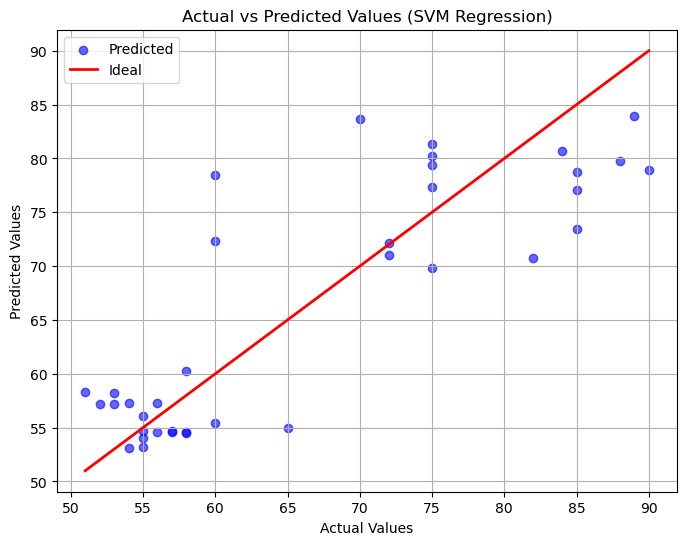

In [193]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create the Actual vs Predicted plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, svm_predict_1, color='blue', label='Predicted', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (SVM Regression)')
plt.legend()
plt.grid(True)
plt.show()


**Export the machine learning models and save them**

In [77]:
# Export the models
import joblib

joblib.dump(best_ridge, 'models/ridge_pipeline.pkl')
joblib.dump(best_random_model, 'models/best_random_model.pkl')
joblib.dump(best_decision_model, 'models/best_decision_model.pkl')
joblib.dump(best_knn_model, 'models/best_knn_model.pkl')
joblib.dump(best_svm_regressor, 'models/best_svm_regressor.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(X_test_scaled, 'models/X_test_scaled.pkl')
joblib.dump(y_test, 'models/y_test.pkl')
joblib.dump(X_test, 'models/X_test.pkl')

['models/X_test.pkl']

# Model Evaluation

**Define the evaluation metrics for each regression model**

                              R2     MAE      MSE    RMSE
Model                                                    
Linear Regression(Ridge)  0.7107  5.0335  41.8605  6.4700
Random Forest             0.7835  4.7043  31.3255  5.5969
Decision Tree             0.7037  5.2611  42.8791  6.5482
KNN                       0.8134  4.3571  27.0011  5.1963
SVR                       0.7155  4.8423  41.1604  6.4156


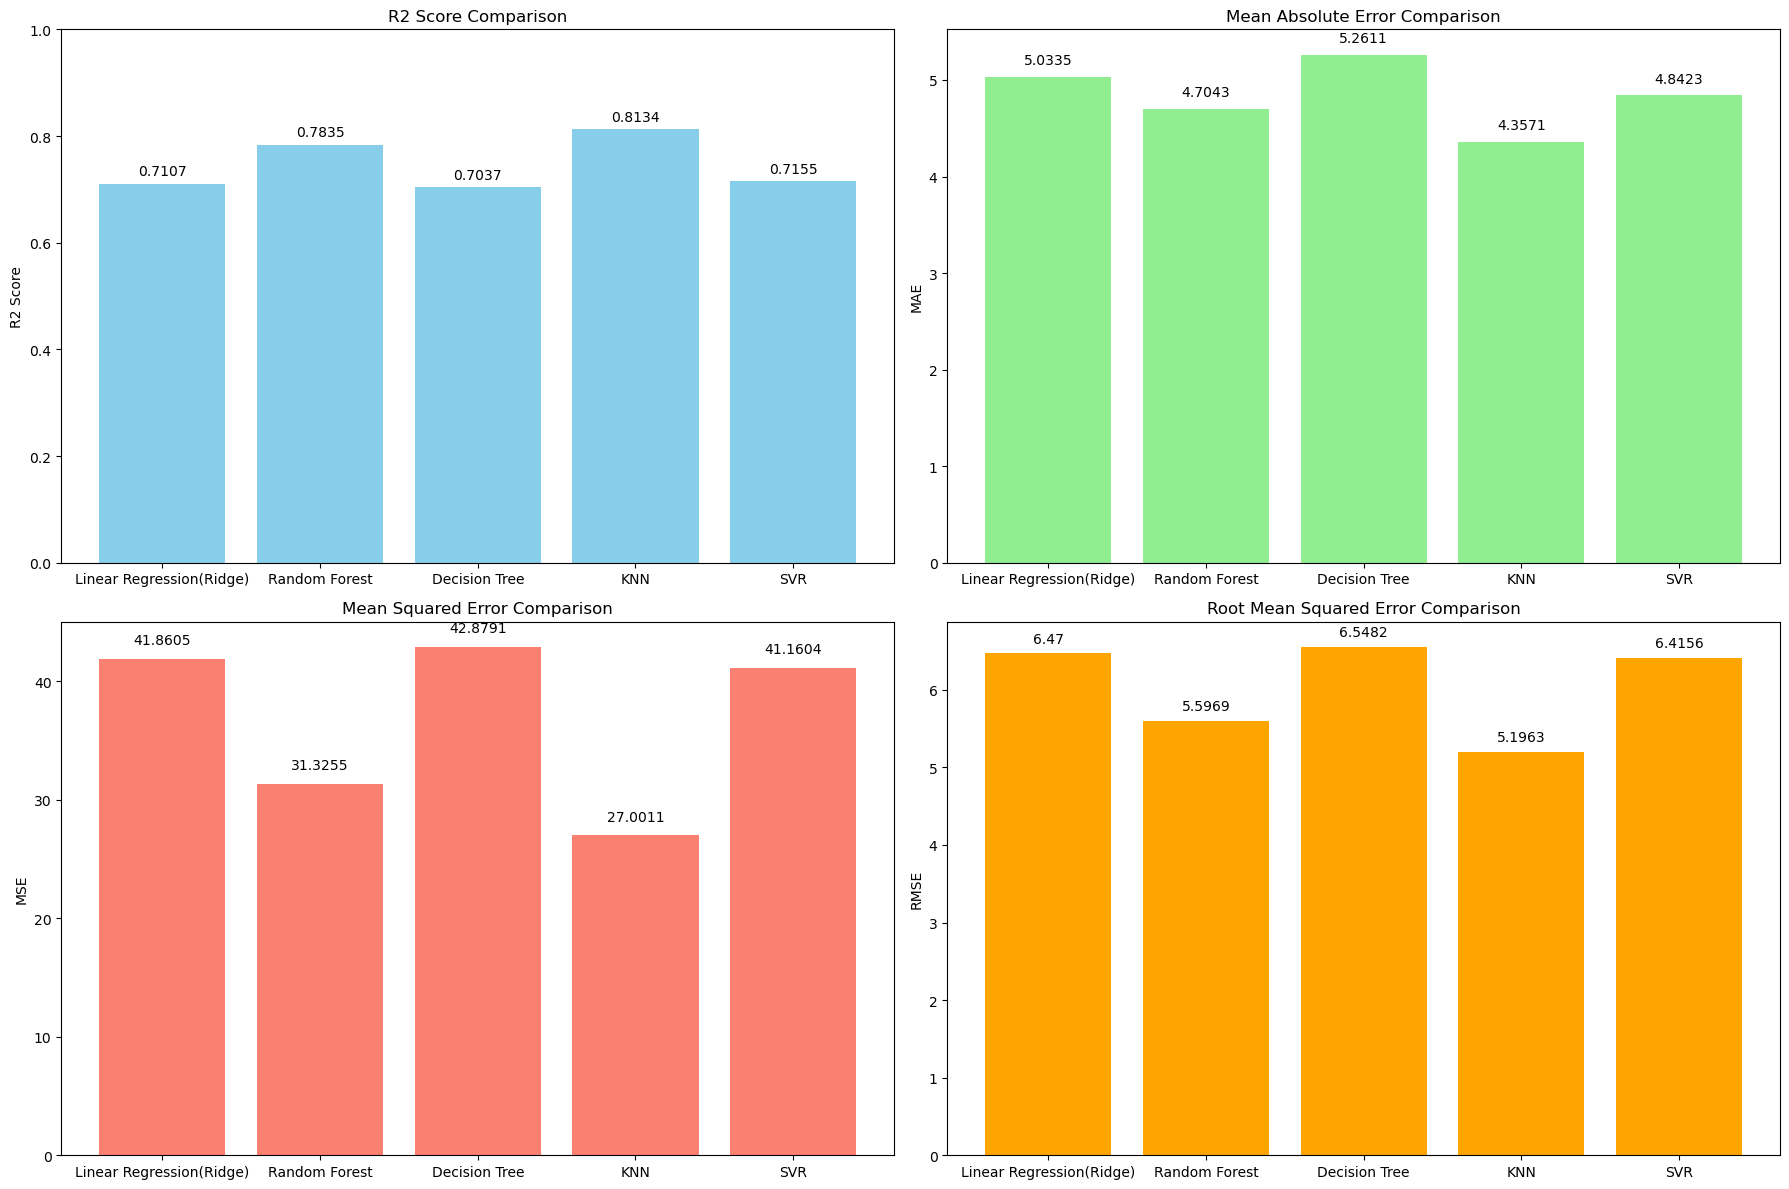

In [78]:
data = {
    'Model': ['Linear Regression(Ridge)', 'Random Forest', 'Decision Tree', 'KNN', 'SVR'],
    'R2': [0.7107, 0.7835, 0.7037, 0.8134, 0.7155],
    'MAE': [5.0335, 4.7043, 5.2611, 4.3571, 4.8423],
    'MSE': [41.8605, 31.3255, 42.8791, 27.0011, 41.1604],
    'RMSE': [6.4700, 5.5969, 6.5482, 5.1963, 6.4156]
}

# Create a DataFrame
df_metrics = pd.DataFrame(data)

# Set the index to the Model names for better visualization
df_metrics.set_index('Model', inplace=True)

# Display the DataFrame
print(df_metrics)

# Plot the evaluation metrics
plt.figure(figsize=(18, 12))

# R2 Score
plt.subplot(2, 2, 1)
bars = plt.bar(df_metrics.index, df_metrics['R2'], color='skyblue')
plt.title('R2 Score Comparison')
plt.ylim(0, 1)
plt.ylabel('R2 Score')

# Adding labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

# MAE
plt.subplot(2, 2, 2)
bars = plt.bar(df_metrics.index, df_metrics['MAE'], color='lightgreen')
plt.title('Mean Absolute Error Comparison')
plt.ylabel('MAE')

# Adding labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 4), ha='center', va='bottom')

# MSE
plt.subplot(2, 2, 3)
bars = plt.bar(df_metrics.index, df_metrics['MSE'], color='salmon')
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')

# Adding labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 4), ha='center', va='bottom')

# RMSE
plt.subplot(2, 2, 4)
bars = plt.bar(df_metrics.index, df_metrics['RMSE'], color='orange')
plt.title('Root Mean Squared Error Comparison')
plt.ylabel('RMSE')

# Adding labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()

- **Linear Regression (Ridge) Model**

The model provides a moderate R-squared value, which suggests that it explains about 71% of the variance in sleep quality. The average deviation between predicted and actual values is approximately 5 to 6 units, as indicated by the rather high MAE and RMSE values.

- **Random Forest Regression Model**

This model performs better than Ridge regression, explaining approximately 78% of the variance with lower errors (MAE and RMSE), indicating more accurate predictions compared to the linear model.

- **Decision Tree Regression Model**

This model performs lower than Ridge regression and is largely comparable to Random Forest. Given its considerably lower R-squared value and greater error metrics, it is not the best model in this comparison.



- **KNN Regression Model**

The highest R-squared value is achieved by KNN, which accounts for around 81% of the variance. In addition, it has the lowest error metrics (MAE, MSE, and RMSE) when compared to all of the other models, which indicates that this model offers the most accurate predictions in comparison to the others.

- **SVR Model**

The SVR model is somewhat better to Ridge regression; however, it is still trailing behind Random Forest and KNN. Its error metrics are comparable to those of the Ridge model, and its R-squared value is moderate.

**Best Performing Model: KNN Regression
 Highest R² Score (0.8134): KNN explains the largest proportion of variance in sleep quality (81.34%).
 Lowest MAE (4.3571): When compared to other models, KNN predicts values that are more in line with actual values because it has the smallest average error.
 Lowest RMSE (5.1963): KNN performs better in terms of minimising significant errors, which results in better overall prediction accuracy. It has the minimum RMSE.**

**Consequently, KNN Regression is the best-performing model since it continuously outperforms the other models on all criteria, especially when it comes to minimising errors and explaining data variance. This demonstrates that KNN is able to capture the dataset's patterns better than the other models.**
